In [3]:
#Imports
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 

# Read raw data

In [2]:
#Read raw SOI data
soi_anomaly = pd.read_csv('DATA/soi_anomaly.txt', sep='\s+', header=0)
soi_standard = pd.read_csv('DATA/soi_standardized.txt', sep='\s+', header=0)

In [4]:
#Read raw Missouri crop yield data
mo_crop_yield = pd.read_csv('DATA/MO_crop_yield.csv', sep=',', header=0)

In [4]:
print(soi_anomaly.head())

   YEAR  JAN  FEB  MAR  APR  MAY  JUN  JUL  AUG  SEP  OCT  NOV  DEC
0  1951  2.5  1.5 -0.2 -0.5 -1.1  0.3 -1.7 -0.4 -1.8 -1.6 -1.3 -1.2
1  1952 -1.5 -1.0  0.9 -0.4  1.2  1.2  0.8  0.1 -0.4  0.6  0.0 -2.0
2  1953  0.5 -0.8 -0.3  0.3 -2.8  0.2 -0.0 -2.0 -2.1  0.1 -0.5 -0.8
3  1954  1.1 -0.5  0.4  1.1  0.8  0.2  0.7  1.8  0.3  0.4  0.2  2.3
4  1955 -0.9  3.1  1.1 -0.2  1.7  2.2  2.6  2.4  2.2  2.5  2.0  1.6


In [5]:
print(soi_standard.head())

   YEAR  JAN  FEB  MAR  APR  MAY  JUN  JUL  AUG  SEP  OCT  NOV  DEC
0  1951  1.5  0.9 -0.1 -0.3 -0.7  0.2 -1.0 -0.2 -1.1 -1.0 -0.8 -0.7
1  1952 -0.9 -0.6  0.5 -0.2  0.8  0.7  0.5  0.1 -0.2  0.4  0.0 -1.2
2  1953  0.3 -0.5 -0.2  0.2 -1.7  0.1 -0.0 -1.2 -1.2  0.1 -0.3 -0.5
3  1954  0.7 -0.3  0.3  0.6  0.5  0.1  0.4  1.1  0.2  0.3  0.1  1.4
4  1955 -0.5  1.9  0.6 -0.1  1.0  1.3  1.6  1.5  1.3  1.5  1.2  1.0


In [5]:
print(mo_crop_yield.head())

  Program  Year Period  Week Ending Geo Level     State  State ANSI  \
0  SURVEY  2023   YEAR          NaN     STATE  MISSOURI          29   
1  SURVEY  2023   YEAR          NaN     STATE  MISSOURI          29   
2  SURVEY  2023   YEAR          NaN     STATE  MISSOURI          29   
3  SURVEY  2023   YEAR          NaN     STATE  MISSOURI          29   
4  SURVEY  2023   YEAR          NaN     STATE  MISSOURI          29   

   Ag District  Ag District Code  County  ...  Zip Code  Region  \
0          NaN               NaN     NaN  ...       NaN     NaN   
1          NaN               NaN     NaN  ...       NaN     NaN   
2          NaN               NaN     NaN  ...       NaN     NaN   
3          NaN               NaN     NaN  ...       NaN     NaN   
4          NaN               NaN     NaN  ...       NaN     NaN   

   watershed_code  Watershed  Commodity  \
0               0        NaN       CORN   
1               0        NaN     COTTON   
2               0        NaN       RICE  

In [9]:
print(mo_crop_yield.tail())

    Program  Year Period  Week Ending Geo Level     State  State ANSI  \
360  SURVEY  1951   YEAR          NaN     STATE  MISSOURI          29   
361  SURVEY  1951   YEAR          NaN     STATE  MISSOURI          29   
362  SURVEY  1951   YEAR          NaN     STATE  MISSOURI          29   
363  SURVEY  1951   YEAR          NaN     STATE  MISSOURI          29   
364  SURVEY  1951   YEAR          NaN     STATE  MISSOURI          29   

     Ag District  Ag District Code  County  ...  Zip Code  Region  \
360          NaN               NaN     NaN  ...       NaN     NaN   
361          NaN               NaN     NaN  ...       NaN     NaN   
362          NaN               NaN     NaN  ...       NaN     NaN   
363          NaN               NaN     NaN  ...       NaN     NaN   
364          NaN               NaN     NaN  ...       NaN     NaN   

     watershed_code  Watershed  Commodity  \
360               0        NaN       CORN   
361               0        NaN     COTTON   
362        

In [8]:
print(mo_crop_yield.shape)

(365, 21)


# Explore & clean the MO crop yield data

In [7]:
#Remove columns that have no data or not needed
mo_crop_yield_clean = mo_crop_yield.drop(columns=['Program','Period','Week Ending','Geo Level','State','State ANSI', \
                                                  'Ag District','Ag District Code','County','County ANSI','Zip Code', \
                                                  'Region','watershed_code','Watershed','Domain','Domain Category', \
                                                  'CV (%)'])

In [8]:
print(mo_crop_yield_clean.head())

   Year Commodity                                     Data Item  Value
0  2023      CORN    CORN, GRAIN - YIELD, MEASURED IN BU / ACRE    147
1  2023    COTTON         COTTON - YIELD, MEASURED IN LB / ACRE  1,324
2  2023      RICE           RICE - YIELD, MEASURED IN LB / ACRE  7,500
3  2023  SOYBEANS       SOYBEANS - YIELD, MEASURED IN BU / ACRE     45
4  2023     WHEAT  WHEAT, WINTER - YIELD, MEASURED IN BU / ACRE     70


In [9]:
print(mo_crop_yield_clean.shape)

(365, 4)


In [10]:
print(mo_crop_yield_clean.columns)

Index(['Year', 'Commodity', 'Data Item', 'Value'], dtype='object')


In [11]:
print(mo_crop_yield_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Year       365 non-null    int64 
 1   Commodity  365 non-null    object
 2   Data Item  365 non-null    object
 3   Value      365 non-null    object
dtypes: int64(1), object(3)
memory usage: 11.5+ KB
None


In [12]:
#Rename 'Value' column to 'Yearly Yield'
mo_crop_yield_clean.rename({'Value':'Yearly Yield'}, axis=1, inplace=True)

In [13]:
print(mo_crop_yield_clean.head())

   Year Commodity                                     Data Item Yearly Yield
0  2023      CORN    CORN, GRAIN - YIELD, MEASURED IN BU / ACRE          147
1  2023    COTTON         COTTON - YIELD, MEASURED IN LB / ACRE        1,324
2  2023      RICE           RICE - YIELD, MEASURED IN LB / ACRE        7,500
3  2023  SOYBEANS       SOYBEANS - YIELD, MEASURED IN BU / ACRE           45
4  2023     WHEAT  WHEAT, WINTER - YIELD, MEASURED IN BU / ACRE           70


In [14]:
#Remove commas from 'Yearly Yield' data
mo_crop_yield_clean['Yearly Yield']=mo_crop_yield_clean['Yearly Yield'].str.replace(",","")


In [15]:
print(mo_crop_yield_clean.head())

   Year Commodity                                     Data Item Yearly Yield
0  2023      CORN    CORN, GRAIN - YIELD, MEASURED IN BU / ACRE          147
1  2023    COTTON         COTTON - YIELD, MEASURED IN LB / ACRE         1324
2  2023      RICE           RICE - YIELD, MEASURED IN LB / ACRE         7500
3  2023  SOYBEANS       SOYBEANS - YIELD, MEASURED IN BU / ACRE           45
4  2023     WHEAT  WHEAT, WINTER - YIELD, MEASURED IN BU / ACRE           70


In [16]:
#Convert 'Yearly Yield' data from object to float 
mo_crop_yield_clean['Yearly Yield'] = mo_crop_yield_clean['Yearly Yield'].astype(float)

In [17]:
print(mo_crop_yield_clean.head(15))

    Year Commodity                                     Data Item  Yearly Yield
0   2023      CORN    CORN, GRAIN - YIELD, MEASURED IN BU / ACRE         147.0
1   2023    COTTON         COTTON - YIELD, MEASURED IN LB / ACRE        1324.0
2   2023      RICE           RICE - YIELD, MEASURED IN LB / ACRE        7500.0
3   2023  SOYBEANS       SOYBEANS - YIELD, MEASURED IN BU / ACRE          45.0
4   2023     WHEAT  WHEAT, WINTER - YIELD, MEASURED IN BU / ACRE          70.0
5   2022      CORN    CORN, GRAIN - YIELD, MEASURED IN BU / ACRE         161.0
6   2022    COTTON         COTTON - YIELD, MEASURED IN LB / ACRE        1240.0
7   2022      RICE           RICE - YIELD, MEASURED IN LB / ACRE        7940.0
8   2022  SOYBEANS       SOYBEANS - YIELD, MEASURED IN BU / ACRE          45.5
9   2022     WHEAT  WHEAT, WINTER - YIELD, MEASURED IN BU / ACRE          60.0
10  2021      CORN    CORN, GRAIN - YIELD, MEASURED IN BU / ACRE         159.0
11  2021    COTTON         COTTON - YIELD, MEASURED 

In [18]:
print(mo_crop_yield_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          365 non-null    int64  
 1   Commodity     365 non-null    object 
 2   Data Item     365 non-null    object 
 3   Yearly Yield  365 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 11.5+ KB
None


In [ ]:
#mo_crop_yield_clean_sort = mo_crop_yield_clean.sort_values(by=["Commodity","Year"],ascending=[True,False],ignore_index=True)

In [19]:
#Separate crop data by type 
mo_yield_corn = mo_crop_yield_clean[mo_crop_yield_clean["Commodity"]=='CORN'] 
mo_yield_cotton = mo_crop_yield_clean[mo_crop_yield_clean["Commodity"]=='COTTON']
mo_yield_soybeans = mo_crop_yield_clean[mo_crop_yield_clean["Commodity"]=='SOYBEANS']
mo_yield_rice = mo_crop_yield_clean[mo_crop_yield_clean["Commodity"]=='RICE']
mo_yield_wheat = mo_crop_yield_clean[mo_crop_yield_clean["Commodity"]=='WHEAT']

In [20]:
print(mo_yield_corn.head())

    Year Commodity                                   Data Item  Yearly Yield
0   2023      CORN  CORN, GRAIN - YIELD, MEASURED IN BU / ACRE         147.0
5   2022      CORN  CORN, GRAIN - YIELD, MEASURED IN BU / ACRE         161.0
10  2021      CORN  CORN, GRAIN - YIELD, MEASURED IN BU / ACRE         159.0
15  2020      CORN  CORN, GRAIN - YIELD, MEASURED IN BU / ACRE         171.0
20  2019      CORN  CORN, GRAIN - YIELD, MEASURED IN BU / ACRE         155.0


In [21]:
print(mo_yield_corn.tail())

     Year Commodity                                   Data Item  Yearly Yield
340  1955      CORN  CORN, GRAIN - YIELD, MEASURED IN BU / ACRE          40.0
345  1954      CORN  CORN, GRAIN - YIELD, MEASURED IN BU / ACRE          23.0
350  1953      CORN  CORN, GRAIN - YIELD, MEASURED IN BU / ACRE          33.5
355  1952      CORN  CORN, GRAIN - YIELD, MEASURED IN BU / ACRE          41.0
360  1951      CORN  CORN, GRAIN - YIELD, MEASURED IN BU / ACRE          34.0


In [22]:
print(mo_yield_cotton.head())

    Year Commodity                              Data Item  Yearly Yield
1   2023    COTTON  COTTON - YIELD, MEASURED IN LB / ACRE        1324.0
6   2022    COTTON  COTTON - YIELD, MEASURED IN LB / ACRE        1240.0
11  2021    COTTON  COTTON - YIELD, MEASURED IN LB / ACRE        1260.0
16  2020    COTTON  COTTON - YIELD, MEASURED IN LB / ACRE        1144.0
21  2019    COTTON  COTTON - YIELD, MEASURED IN LB / ACRE        1193.0


In [23]:
print(mo_yield_cotton.tail())

     Year Commodity                              Data Item  Yearly Yield
341  1955    COTTON  COTTON - YIELD, MEASURED IN LB / ACRE         502.0
346  1954    COTTON  COTTON - YIELD, MEASURED IN LB / ACRE         478.0
351  1953    COTTON  COTTON - YIELD, MEASURED IN LB / ACRE         386.0
356  1952    COTTON  COTTON - YIELD, MEASURED IN LB / ACRE         367.0
361  1951    COTTON  COTTON - YIELD, MEASURED IN LB / ACRE         279.0


In [24]:
print(mo_yield_rice.head())

    Year Commodity                            Data Item  Yearly Yield
2   2023      RICE  RICE - YIELD, MEASURED IN LB / ACRE        7500.0
7   2022      RICE  RICE - YIELD, MEASURED IN LB / ACRE        7940.0
12  2021      RICE  RICE - YIELD, MEASURED IN LB / ACRE        8040.0
17  2020      RICE  RICE - YIELD, MEASURED IN LB / ACRE        7250.0
22  2019      RICE  RICE - YIELD, MEASURED IN LB / ACRE        7370.0


In [25]:
print(mo_yield_rice.tail())

     Year Commodity                            Data Item  Yearly Yield
342  1955      RICE  RICE - YIELD, MEASURED IN LB / ACRE        2600.0
347  1954      RICE  RICE - YIELD, MEASURED IN LB / ACRE        2650.0
352  1953      RICE  RICE - YIELD, MEASURED IN LB / ACRE        2500.0
357  1952      RICE  RICE - YIELD, MEASURED IN LB / ACRE        2450.0
362  1951      RICE  RICE - YIELD, MEASURED IN LB / ACRE        2575.0


In [26]:
#For cotton & rice, convert lb/acre to bushel(bu)/acre
#cotton: 32 pounds per bushel 
#rice: 45 pounds per bushel (paddy rice) & 60 pounds per bushel (husked rice)

mo_yield_cotton["Yearly Yield"] = mo_yield_cotton["Yearly Yield"].apply(lambda x:(x*(1/32.))).round()

mo_yield_rice["Yearly Yield"] = mo_yield_rice["Yearly Yield"].apply(lambda x:(x*(1/45.))).round()

/var/folders/cx/wp0ffkfd3h32cgy6c0r6xtwc0000gn/T/ipykernel_44696/3697546784.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mo_yield_cotton["Yearly Yield"] = mo_yield_cotton["Yearly Yield"].apply(lambda x:(x*(1/32.))).round()
/var/folders/cx/wp0ffkfd3h32cgy6c0r6xtwc0000gn/T/ipykernel_44696/3697546784.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mo_yield_rice["Yearly Yield"] = mo_yield_rice["Yearly Yield"].apply(lambda x:(x*(1/45.))).round()


In [27]:
print(mo_yield_cotton.head())

    Year Commodity                              Data Item  Yearly Yield
1   2023    COTTON  COTTON - YIELD, MEASURED IN LB / ACRE          41.0
6   2022    COTTON  COTTON - YIELD, MEASURED IN LB / ACRE          39.0
11  2021    COTTON  COTTON - YIELD, MEASURED IN LB / ACRE          39.0
16  2020    COTTON  COTTON - YIELD, MEASURED IN LB / ACRE          36.0
21  2019    COTTON  COTTON - YIELD, MEASURED IN LB / ACRE          37.0


In [28]:
print(mo_yield_rice.head())

    Year Commodity                            Data Item  Yearly Yield
2   2023      RICE  RICE - YIELD, MEASURED IN LB / ACRE         167.0
7   2022      RICE  RICE - YIELD, MEASURED IN LB / ACRE         176.0
12  2021      RICE  RICE - YIELD, MEASURED IN LB / ACRE         179.0
17  2020      RICE  RICE - YIELD, MEASURED IN LB / ACRE         161.0
22  2019      RICE  RICE - YIELD, MEASURED IN LB / ACRE         164.0


In [29]:
#For each crop, remove 'Data Item' column and add 'Units' column 
mo_yield_corn.drop(columns='Data Item', inplace=True)
mo_yield_cotton.drop(columns='Data Item', inplace=True)
mo_yield_soybeans.drop(columns='Data Item', inplace=True)
mo_yield_rice.drop(columns='Data Item', inplace=True)
mo_yield_wheat.drop(columns='Data Item', inplace=True)

/var/folders/cx/wp0ffkfd3h32cgy6c0r6xtwc0000gn/T/ipykernel_44696/1430308307.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mo_yield_corn.drop(columns='Data Item', inplace=True)
/var/folders/cx/wp0ffkfd3h32cgy6c0r6xtwc0000gn/T/ipykernel_44696/1430308307.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mo_yield_cotton.drop(columns='Data Item', inplace=True)
/var/folders/cx/wp0ffkfd3h32cgy6c0r6xtwc0000gn/T/ipykernel_44696/1430308307.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [30]:
print(mo_yield_corn.head())

    Year Commodity  Yearly Yield
0   2023      CORN         147.0
5   2022      CORN         161.0
10  2021      CORN         159.0
15  2020      CORN         171.0
20  2019      CORN         155.0


In [31]:
mo_yield_corn['Units'] = 'bu / acre'
mo_yield_cotton['Units'] = 'bu / acre'
mo_yield_soybeans['Units'] = 'bu / acre'
mo_yield_rice['Units'] = 'bu / acre'
mo_yield_wheat['Units'] = 'bu / acre'

/var/folders/cx/wp0ffkfd3h32cgy6c0r6xtwc0000gn/T/ipykernel_44696/3592671306.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mo_yield_corn['Units'] = 'bu / acre'
/var/folders/cx/wp0ffkfd3h32cgy6c0r6xtwc0000gn/T/ipykernel_44696/3592671306.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mo_yield_cotton['Units'] = 'bu / acre'
/var/folders/cx/wp0ffkfd3h32cgy6c0r6xtwc0000gn/T/ipykernel_44696/3592671306.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [32]:
print(mo_yield_corn.head())

    Year Commodity  Yearly Yield      Units
0   2023      CORN         147.0  bu / acre
5   2022      CORN         161.0  bu / acre
10  2021      CORN         159.0  bu / acre
15  2020      CORN         171.0  bu / acre
20  2019      CORN         155.0  bu / acre


In [33]:
print(mo_yield_wheat.head())

    Year Commodity  Yearly Yield      Units
4   2023     WHEAT          70.0  bu / acre
9   2022     WHEAT          60.0  bu / acre
14  2021     WHEAT          65.0  bu / acre
19  2020     WHEAT          62.0  bu / acre
24  2019     WHEAT          63.0  bu / acre


In [34]:
print(mo_yield_cotton.head())

    Year Commodity  Yearly Yield      Units
1   2023    COTTON          41.0  bu / acre
6   2022    COTTON          39.0  bu / acre
11  2021    COTTON          39.0  bu / acre
16  2020    COTTON          36.0  bu / acre
21  2019    COTTON          37.0  bu / acre


In [35]:
print(mo_yield_soybeans.head())

    Year Commodity  Yearly Yield      Units
3   2023  SOYBEANS          45.0  bu / acre
8   2022  SOYBEANS          45.5  bu / acre
13  2021  SOYBEANS          49.0  bu / acre
18  2020  SOYBEANS          51.0  bu / acre
23  2019  SOYBEANS          46.0  bu / acre


In [36]:
print(mo_yield_rice.head())

    Year Commodity  Yearly Yield      Units
2   2023      RICE         167.0  bu / acre
7   2022      RICE         176.0  bu / acre
12  2021      RICE         179.0  bu / acre
17  2020      RICE         161.0  bu / acre
22  2019      RICE         164.0  bu / acre


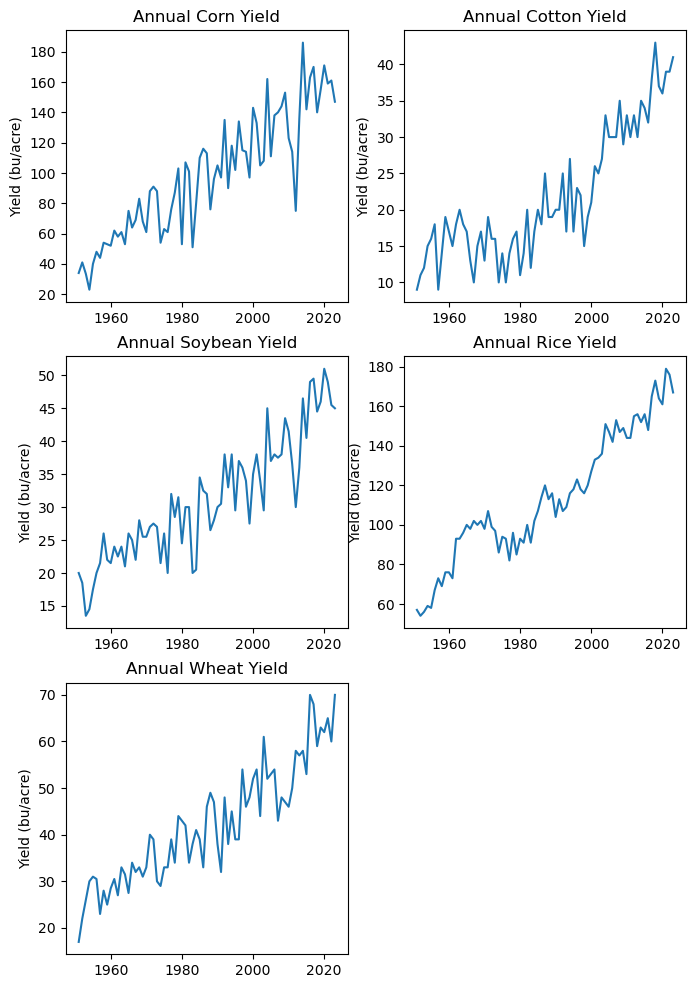

In [37]:
#plot timeseries of each crop 
fig,ax = plt.subplots(3,2,figsize=(8,12))
ax[0,0].plot(mo_yield_corn['Year'],mo_yield_corn['Yearly Yield'])
ax[0,0].set_ylabel('Yield (bu/acre)')
#ax[0,0].set_xlabel('Years')
ax[0,0].set_title('Annual Corn Yield')

ax[0,1].plot(mo_yield_cotton['Year'],mo_yield_cotton['Yearly Yield'])
ax[0,1].set_ylabel('Yield (bu/acre)')
#ax[0,1].set_xlabel('Years')
ax[0,1].set_title('Annual Cotton Yield')

ax[1,0].plot(mo_yield_soybeans['Year'],mo_yield_soybeans['Yearly Yield'])
ax[1,0].set_ylabel('Yield (bu/acre)')
#ax[1,0].set_xlabel('Years')
ax[1,0].set_title('Annual Soybean Yield')

ax[1,1].plot(mo_yield_rice['Year'],mo_yield_rice['Yearly Yield'])
ax[1,1].set_ylabel('Yield (bu/acre)')
#ax[1,1].set_xlabel('Years')
ax[1,1].set_title('Annual Rice Yield')

ax[2,0].plot(mo_yield_wheat['Year'],mo_yield_wheat['Yearly Yield'])
ax[2,0].set_ylabel('Yield (bu/acre)')
#ax[2,0].set_xlabel('Years')
ax[2,0].set_title('Annual Wheat Yield')

fig.delaxes(ax[2,1])

plt.show()

# Explore and clean the SOI data 

In [38]:
print(soi_standard.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    73 non-null     int64  
 1   JAN     73 non-null     float64
 2   FEB     73 non-null     float64
 3   MAR     73 non-null     float64
 4   APR     73 non-null     float64
 5   MAY     73 non-null     float64
 6   JUN     73 non-null     float64
 7   JUL     73 non-null     float64
 8   AUG     73 non-null     float64
 9   SEP     73 non-null     float64
 10  OCT     73 non-null     float64
 11  NOV     73 non-null     float64
 12  DEC     73 non-null     float64
dtypes: float64(12), int64(1)
memory usage: 7.5 KB
None


In [39]:
print(soi_standard.head())

   YEAR  JAN  FEB  MAR  APR  MAY  JUN  JUL  AUG  SEP  OCT  NOV  DEC
0  1951  1.5  0.9 -0.1 -0.3 -0.7  0.2 -1.0 -0.2 -1.1 -1.0 -0.8 -0.7
1  1952 -0.9 -0.6  0.5 -0.2  0.8  0.7  0.5  0.1 -0.2  0.4  0.0 -1.2
2  1953  0.3 -0.5 -0.2  0.2 -1.7  0.1 -0.0 -1.2 -1.2  0.1 -0.3 -0.5
3  1954  0.7 -0.3  0.3  0.6  0.5  0.1  0.4  1.1  0.2  0.3  0.1  1.4
4  1955 -0.5  1.9  0.6 -0.1  1.0  1.3  1.6  1.5  1.3  1.5  1.2  1.0


In [40]:
print(soi_standard[soi_standard['YEAR'] == 1997])

    YEAR  JAN  FEB  MAR  APR  MAY  JUN  JUL  AUG  SEP  OCT  NOV  DEC
46  1997  0.5  1.7 -0.4 -0.6 -1.3 -1.4 -0.8 -1.4 -1.4 -1.5 -1.2 -1.0


In [41]:
print(soi_standard[soi_standard['YEAR'] == 1998])

    YEAR  JAN  FEB  MAR  APR  MAY  JUN  JUL  AUG  SEP  OCT  NOV  DEC
47  1998 -2.7 -2.0 -2.4 -1.4  0.3  1.0  1.2  1.2  1.0  1.1  1.0  1.4


In [42]:
print(soi_standard[soi_standard['YEAR'] == 1982])

    YEAR  JAN  FEB  MAR  APR  MAY  JUN  JUL  AUG  SEP  OCT  NOV  DEC
31  1982  1.2  0.3  0.6  0.1 -0.3 -1.0 -1.5 -1.7 -1.7 -1.7 -2.6 -2.2


In [43]:
print(soi_standard[soi_standard['YEAR'] == 1983])

    YEAR  JAN  FEB  MAR  APR  MAY  JUN  JUL  AUG  SEP  OCT  NOV  DEC
32  1983 -3.5 -3.6 -2.4 -0.9  0.6  0.0 -0.6  0.1  0.9  0.4 -0.1  0.0


In [44]:
soi_standard_new = soi_standard.copy()

In [45]:
print(soi_standard_new.head())

   YEAR  JAN  FEB  MAR  APR  MAY  JUN  JUL  AUG  SEP  OCT  NOV  DEC
0  1951  1.5  0.9 -0.1 -0.3 -0.7  0.2 -1.0 -0.2 -1.1 -1.0 -0.8 -0.7
1  1952 -0.9 -0.6  0.5 -0.2  0.8  0.7  0.5  0.1 -0.2  0.4  0.0 -1.2
2  1953  0.3 -0.5 -0.2  0.2 -1.7  0.1 -0.0 -1.2 -1.2  0.1 -0.3 -0.5
3  1954  0.7 -0.3  0.3  0.6  0.5  0.1  0.4  1.1  0.2  0.3  0.1  1.4
4  1955 -0.5  1.9  0.6 -0.1  1.0  1.3  1.6  1.5  1.3  1.5  1.2  1.0


In [46]:
print(soi_standard_new.index)

RangeIndex(start=0, stop=73, step=1)


In [ ]:
#Calculate Dec-Jan-Feb-Mar mean SOI for each year to identify period as El Nino, La Nina, or Neutral
#NOTE: the Dec index comes from previous year    

In [47]:
#Function to compute Dec-Jan_Feb_Mar mean SOI
def calculate_mean_soi(soi,soi_minus):
    
    hold = soi[0:3]
    hold_minus = soi_minus[11]
    
    hold.insert(0,hold_minus) 
    
    mean_soi = round(sum(hold)/len(hold),2)
    
    return mean_soi

In [48]:
#Calculate the Dec-Jan-Feb-Mar mean SOI for each year
mean_soi = []

#item=1
#yr = soi_standard_new['YEAR'][item]
#print(yr)

#temp = list(soi_standard_new.iloc[item][1:13])
#temp_minus = list(soi_standard_new.iloc[item-1][1:13])
#print(temp)
#print(temp_minus)


for item in soi_standard_new.index:
    
    yr = soi_standard_new['YEAR'][item]
    
    if yr >= 1952:
        
        temp = list(soi_standard_new.iloc[item][1:13])
        temp_minus = list(soi_standard_new.iloc[item-1][1:13])

        mean_soi.append(calculate_mean_soi(temp,temp_minus))
        
    else:
        
        mean_soi.append(-9999.)

In [49]:
for item in soi_standard_new.index:
    print(soi_standard_new['YEAR'][item],mean_soi[item])
    

1951 -9999.0
1952 -0.43
1953 -0.4
1954 0.05
1955 0.85
1956 1.3
1957 0.45
1958 -0.6
1959 -0.4
1960 0.53
1961 -0.1
1962 0.83
1963 0.72
1964 -0.12
1965 0.13
1966 -0.55
1967 1.07
1968 0.33
1969 -0.35
1970 -0.28
1971 1.65
1972 0.62
1973 -0.57
1974 2.18
1975 0.53
1976 1.73
1977 0.0
1978 -1.08
1979 0.15
1980 -0.1
1981 -0.3
1982 0.65
1983 -2.93
1984 0.23
1985 0.4
1986 0.17
1987 -1.15
1988 -0.1
1989 1.25
1990 -0.7
1991 0.0
1992 -1.9
1993 -0.68
1994 -0.07
1995 -0.23
1996 0.48
1997 0.67
1998 -2.02
1999 1.38
2000 1.27
2001 1.1
2002 0.12
2003 -0.57
2004 0.35
2005 -0.83
2006 0.9
2007 -0.25
2008 1.88
2009 1.2
2010 -1.0
2011 2.6
2012 1.2
2013 0.15
2014 0.18
2015 -0.47
2016 -1.23
2017 0.33
2018 0.5
2019 -0.17
2020 -0.15
2021 1.4
2022 1.23
2023 1.28


In [50]:
soi_standard_new['DJFM mean'] = mean_soi

In [51]:
print(soi_standard_new.head())

   YEAR  JAN  FEB  MAR  APR  MAY  JUN  JUL  AUG  SEP  OCT  NOV  DEC  DJFM mean
0  1951  1.5  0.9 -0.1 -0.3 -0.7  0.2 -1.0 -0.2 -1.1 -1.0 -0.8 -0.7   -9999.00
1  1952 -0.9 -0.6  0.5 -0.2  0.8  0.7  0.5  0.1 -0.2  0.4  0.0 -1.2      -0.43
2  1953  0.3 -0.5 -0.2  0.2 -1.7  0.1 -0.0 -1.2 -1.2  0.1 -0.3 -0.5      -0.40
3  1954  0.7 -0.3  0.3  0.6  0.5  0.1  0.4  1.1  0.2  0.3  0.1  1.4       0.05
4  1955 -0.5  1.9  0.6 -0.1  1.0  1.3  1.6  1.5  1.3  1.5  1.2  1.0       0.85


In [52]:
#Remove row associated with 1951
soi_standard_new_test = soi_standard_new[soi_standard_new['DJFM mean'] != -9999.]

In [53]:
print(soi_standard_new_test.head())

   YEAR  JAN  FEB  MAR  APR  MAY  JUN  JUL  AUG  SEP  OCT  NOV  DEC  DJFM mean
1  1952 -0.9 -0.6  0.5 -0.2  0.8  0.7  0.5  0.1 -0.2  0.4  0.0 -1.2      -0.43
2  1953  0.3 -0.5 -0.2  0.2 -1.7  0.1 -0.0 -1.2 -1.2  0.1 -0.3 -0.5      -0.40
3  1954  0.7 -0.3  0.3  0.6  0.5  0.1  0.4  1.1  0.2  0.3  0.1  1.4       0.05
4  1955 -0.5  1.9  0.6 -0.1  1.0  1.3  1.6  1.5  1.3  1.5  1.2  1.0       0.85
5  1956  1.3  1.6  1.3  0.9  1.4  1.1  1.1  1.2  0.1  1.8  0.2  1.1       1.30


In [54]:
soi_standard_new_djfm = soi_standard_new_test.drop(columns=['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG', \
                                                            'SEP','OCT','NOV','DEC'])

In [55]:
print(soi_standard_new_djfm.head())

   YEAR  DJFM mean
1  1952      -0.43
2  1953      -0.40
3  1954       0.05
4  1955       0.85
5  1956       1.30


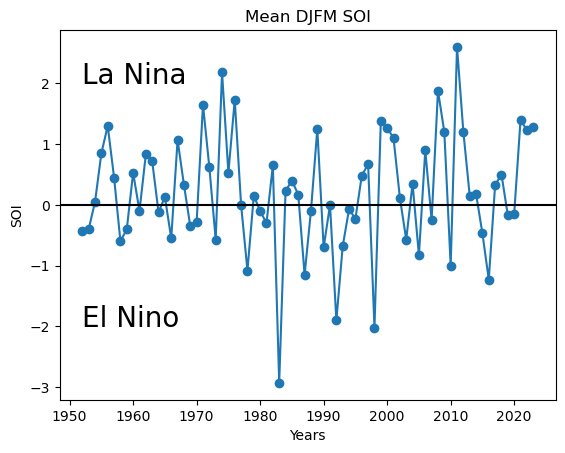

In [56]:
#colors = np.where(soi_standard_new_djfm['DJFM mean'] >= 0.,'blue','red')

fig,ax = plt.subplots()
ax.plot(soi_standard_new_djfm['YEAR'], soi_standard_new_djfm['DJFM mean'],marker='o')
ax.set_ylabel('SOI')
ax.set_xlabel('Years')
ax.set_title('Mean DJFM SOI')
plt.axhline(0, color='black')

ax.annotate('La Nina',
            xy=[1952,2],
            fontsize=20)

ax.annotate('El Nino',
            xy=[1952,-2],
            fontsize=20)
plt.show()

# Merge cleaned datasets

In [57]:
#Concatenate crop yield datasets 
mo_yield_concat = pd.concat([mo_yield_corn.reset_index(drop=True), \
                             mo_yield_cotton.reset_index(drop=True), \
                             mo_yield_rice.reset_index(drop=True), \
                             mo_yield_soybeans.reset_index(drop=True), \
                             mo_yield_wheat.reset_index(drop=True)], \
                            axis=1, \
                            ignore_index=False)

In [58]:
print(mo_yield_concat.head())

   Year Commodity  Yearly Yield      Units  Year Commodity  Yearly Yield  \
0  2023      CORN         147.0  bu / acre  2023    COTTON          41.0   
1  2022      CORN         161.0  bu / acre  2022    COTTON          39.0   
2  2021      CORN         159.0  bu / acre  2021    COTTON          39.0   
3  2020      CORN         171.0  bu / acre  2020    COTTON          36.0   
4  2019      CORN         155.0  bu / acre  2019    COTTON          37.0   

       Units  Year Commodity  Yearly Yield      Units  Year Commodity  \
0  bu / acre  2023      RICE         167.0  bu / acre  2023  SOYBEANS   
1  bu / acre  2022      RICE         176.0  bu / acre  2022  SOYBEANS   
2  bu / acre  2021      RICE         179.0  bu / acre  2021  SOYBEANS   
3  bu / acre  2020      RICE         161.0  bu / acre  2020  SOYBEANS   
4  bu / acre  2019      RICE         164.0  bu / acre  2019  SOYBEANS   

   Yearly Yield      Units  Year Commodity  Yearly Yield      Units  
0          45.0  bu / acre  2023  

In [59]:
print(mo_yield_concat.columns)

Index(['Year', 'Commodity', 'Yearly Yield', 'Units', 'Year', 'Commodity',
       'Yearly Yield', 'Units', 'Year', 'Commodity', 'Yearly Yield', 'Units',
       'Year', 'Commodity', 'Yearly Yield', 'Units', 'Year', 'Commodity',
       'Yearly Yield', 'Units'],
      dtype='object')


In [62]:
#Rename concatenated columns 
mo_yield_concat.columns = ['Year Corn', 'Commodity Corn', 'Yearly Yield Corn', 'Units Corn', \
                           'Year Cotton', 'Commodity Cotton', 'Yearly Yield Cotton', 'Units Cotton', \
                           'Year Rice', 'Commodity Rice', 'Yearly Yield Rice', 'Units Rice', \
                           'Year Soybeans', 'Commodity Soybeans', 'Yearly Yield Soybeans', 'Units Soybeans', \
                           'Year Wheat', 'Commodity Wheat', 'Yearly Yield Wheat', 'Units Wheat']

In [63]:
print(mo_yield_concat.columns)

Index(['Year Corn', 'Commodity Corn', 'Yearly Yield Corn', 'Units Corn',
       'Year Cotton', 'Commodity Cotton', 'Yearly Yield Cotton',
       'Units Cotton', 'Year Rice', 'Commodity Rice', 'Yearly Yield Rice',
       'Units Rice', 'Year Soybeans', 'Commodity Soybeans',
       'Yearly Yield Soybeans', 'Units Soybeans', 'Year Wheat',
       'Commodity Wheat', 'Yearly Yield Wheat', 'Units Wheat'],
      dtype='object')


In [64]:
print(mo_yield_concat.head())

   Year Corn Commodity Corn  Yearly Yield Corn Units Corn  Year Cotton  \
0       2023           CORN              147.0  bu / acre         2023   
1       2022           CORN              161.0  bu / acre         2022   
2       2021           CORN              159.0  bu / acre         2021   
3       2020           CORN              171.0  bu / acre         2020   
4       2019           CORN              155.0  bu / acre         2019   

  Commodity Cotton  Yearly Yield Cotton Units Cotton  Year Rice  \
0           COTTON                 41.0    bu / acre       2023   
1           COTTON                 39.0    bu / acre       2022   
2           COTTON                 39.0    bu / acre       2021   
3           COTTON                 36.0    bu / acre       2020   
4           COTTON                 37.0    bu / acre       2019   

  Commodity Rice  Yearly Yield Rice Units Rice  Year Soybeans  \
0           RICE              167.0  bu / acre           2023   
1           RICE      

In [65]:
print(mo_yield_concat.columns)

Index(['Year Corn', 'Commodity Corn', 'Yearly Yield Corn', 'Units Corn',
       'Year Cotton', 'Commodity Cotton', 'Yearly Yield Cotton',
       'Units Cotton', 'Year Rice', 'Commodity Rice', 'Yearly Yield Rice',
       'Units Rice', 'Year Soybeans', 'Commodity Soybeans',
       'Yearly Yield Soybeans', 'Units Soybeans', 'Year Wheat',
       'Commodity Wheat', 'Yearly Yield Wheat', 'Units Wheat'],
      dtype='object')


In [66]:
#Remove duplicate and unneeded columns 
mo_yield_concat_drop = mo_yield_concat.drop(columns=['Commodity Corn', 'Units Corn', \
                                                      'Year Cotton', 'Commodity Cotton', 'Units Cotton', \
                                                      'Year Rice', 'Commodity Rice', 'Units Rice', \
                                                      'Year Soybeans', 'Commodity Soybeans', 'Units Soybeans', \
                                                      'Year Wheat', 'Commodity Wheat'])

In [67]:
print(mo_yield_concat_drop.head())

   Year Corn  Yearly Yield Corn  Yearly Yield Cotton  Yearly Yield Rice  \
0       2023              147.0                 41.0              167.0   
1       2022              161.0                 39.0              176.0   
2       2021              159.0                 39.0              179.0   
3       2020              171.0                 36.0              161.0   
4       2019              155.0                 37.0              164.0   

   Yearly Yield Soybeans  Yearly Yield Wheat Units Wheat  
0                   45.0                70.0   bu / acre  
1                   45.5                60.0   bu / acre  
2                   49.0                65.0   bu / acre  
3                   51.0                62.0   bu / acre  
4                   46.0                63.0   bu / acre  


In [68]:
#Rename columns 
mo_yield_concat_drop.rename({'Year Corn':'Year', 'Units Wheat':'Units'}, axis=1, inplace=True)

In [69]:
print(mo_yield_concat_drop.head())

   Year  Yearly Yield Corn  Yearly Yield Cotton  Yearly Yield Rice  \
0  2023              147.0                 41.0              167.0   
1  2022              161.0                 39.0              176.0   
2  2021              159.0                 39.0              179.0   
3  2020              171.0                 36.0              161.0   
4  2019              155.0                 37.0              164.0   

   Yearly Yield Soybeans  Yearly Yield Wheat      Units  
0                   45.0                70.0  bu / acre  
1                   45.5                60.0  bu / acre  
2                   49.0                65.0  bu / acre  
3                   51.0                62.0  bu / acre  
4                   46.0                63.0  bu / acre  


In [70]:
#Rename columns 
mo_yield_concat_drop.rename({'Yearly Yield Corn':'Corn Yield', \
                             'Yearly Yield Cotton':'Cotton Yield', \
                             'Yearly Yield Rice':'Rice Yield', \
                             'Yearly Yield Soybeans':'Soybean Yield', \
                             'Yearly Yield Wheat':'Wheat Yield'}, axis=1, inplace=True)

In [74]:
mo_yield_concat_drop.rename({'Units':'Yield Units'}, axis=1, inplace=True)

In [75]:
print(mo_yield_concat_drop.head())

   Year  Corn Yield  Cotton Yield  Rice Yield  Soybean Yield  Wheat Yield  \
0  2023       147.0          41.0       167.0           45.0         70.0   
1  2022       161.0          39.0       176.0           45.5         60.0   
2  2021       159.0          39.0       179.0           49.0         65.0   
3  2020       171.0          36.0       161.0           51.0         62.0   
4  2019       155.0          37.0       164.0           46.0         63.0   

  Yield Units  
0   bu / acre  
1   bu / acre  
2   bu / acre  
3   bu / acre  
4   bu / acre  


In [85]:
#Remove row associated with 1951
ii = mo_yield_concat_drop.index[mo_yield_concat_drop['Year']==1951]
print(ii)
print(mo_yield_concat_drop.loc[ii])

Int64Index([72], dtype='int64')
    Year  Corn Yield  Cotton Yield  Rice Yield  Soybean Yield  Wheat Yield  \
72  1951        34.0           9.0        57.0           20.0         17.0   

   Yield Units  
72   bu / acre  


In [86]:
mo_yield_concat_drop.drop(ii,axis=0,inplace=True)

In [87]:
print(mo_yield_concat_drop.tail())

    Year  Corn Yield  Cotton Yield  Rice Yield  Soybean Yield  Wheat Yield  \
67  1956        48.0          18.0        67.0           20.0         30.5   
68  1955        40.0          16.0        58.0           17.5         31.0   
69  1954        23.0          15.0        59.0           14.5         30.0   
70  1953        33.5          12.0        56.0           13.5         26.0   
71  1952        41.0          11.0        54.0           18.5         22.0   

   Yield Units  
67   bu / acre  
68   bu / acre  
69   bu / acre  
70   bu / acre  
71   bu / acre  


In [72]:
print(soi_standard_new_djfm.head())

   YEAR  DJFM mean
1  1952      -0.43
2  1953      -0.40
3  1954       0.05
4  1955       0.85
5  1956       1.30


In [73]:
print(soi_standard_new_djfm.tail())

    YEAR  DJFM mean
68  2019      -0.17
69  2020      -0.15
70  2021       1.40
71  2022       1.23
72  2023       1.28


In [76]:
#Rename columns
soi_standard_new_djfm.rename({'YEAR':'Year'}, axis=1, inplace=True)

In [78]:
soi_standard_new_djfm.rename({'DJFM mean':'DJFM Mean SOI'}, axis=1, inplace=True)

In [79]:
print(soi_standard_new_djfm.head())

   Year  DJFM Mean SOI
1  1952          -0.43
2  1953          -0.40
3  1954           0.05
4  1955           0.85
5  1956           1.30


In [88]:
#Merge crop yield data & DJFM mean SOI data
final_df = pd.merge(mo_yield_concat_drop,soi_standard_new_djfm, on='Year', how='inner')

In [89]:
print(final_df.head())

   Year  Corn Yield  Cotton Yield  Rice Yield  Soybean Yield  Wheat Yield  \
0  2023       147.0          41.0       167.0           45.0         70.0   
1  2022       161.0          39.0       176.0           45.5         60.0   
2  2021       159.0          39.0       179.0           49.0         65.0   
3  2020       171.0          36.0       161.0           51.0         62.0   
4  2019       155.0          37.0       164.0           46.0         63.0   

  Yield Units  DJFM Mean SOI  
0   bu / acre           1.28  
1   bu / acre           1.23  
2   bu / acre           1.40  
3   bu / acre          -0.15  
4   bu / acre          -0.17  


In [90]:
print(final_df.tail())

    Year  Corn Yield  Cotton Yield  Rice Yield  Soybean Yield  Wheat Yield  \
67  1956        48.0          18.0        67.0           20.0         30.5   
68  1955        40.0          16.0        58.0           17.5         31.0   
69  1954        23.0          15.0        59.0           14.5         30.0   
70  1953        33.5          12.0        56.0           13.5         26.0   
71  1952        41.0          11.0        54.0           18.5         22.0   

   Yield Units  DJFM Mean SOI  
67   bu / acre           1.30  
68   bu / acre           0.85  
69   bu / acre           0.05  
70   bu / acre          -0.40  
71   bu / acre          -0.43  


In [92]:
# save the data to a new csv file
final_df.to_csv('crop_yield_plus_soi.csv', index=False)